# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [83]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [84]:
url = "http://api.openweathermap.org/data/2.5/weather?"
i = 1
j = 1
setnum = 1
mtrcs = "metric"

resp=[]

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + mtrcs
    print(f"Processing Record {i} of set {setnum} | {city}")
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    i = i + 1
    if i == 50:
        setnum = setnum + 1
        i = 1

    if weather_json['cod'] == 404:
        print("City not found. Skipping...")
    elif weather_json['cod'] == 200:
        resp.append(weather_json)
        
    # remove the below code before final check in
    #j = j + 1
    #if j == 20:
    #    break

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | rikitea
Processing Record 2 of set 1 | taolanaro
Processing Record 3 of set 1 | hermanus
Processing Record 4 of set 1 | hobart
Processing Record 5 of set 1 | kyren
Processing Record 6 of set 1 | klerksdorp
Processing Record 7 of set 1 | vizimyary
Processing Record 8 of set 1 | kavieng
Processing Record 9 of set 1 | dikson
Processing Record 10 of set 1 | mataura
Processing Record 11 of set 1 | busselton
Processing Record 12 of set 1 | pisco
Processing Record 13 of set 1 | bluff
Processing Record 14 of set 1 | vaini
Processing Record 15 of set 1 | balkanabat
Processing Record 16 of set 1 | kirgiz-miyaki
Processing Record 17 of set 1 | barrow
Processing Record 18 of set 1 | matagami
Processing Record 19 of set 1 | illoqqortoormiut
Processing Record 20 of set 1 | north bend
Processing Record 21 of set 1 | nalut
Processing Record 22 of set 1 | torbay
Processing Record 23 of set 1 | punta arenas
Processing 

Processing Record 3 of set 5 | linhares
Processing Record 4 of set 5 | warrington
Processing Record 5 of set 5 | mosta
Processing Record 6 of set 5 | iralaya
Processing Record 7 of set 5 | chuy
Processing Record 8 of set 5 | chekhov
Processing Record 9 of set 5 | alice springs
Processing Record 10 of set 5 | college
Processing Record 11 of set 5 | sao filipe
Processing Record 12 of set 5 | coalcoman
Processing Record 13 of set 5 | nishihara
Processing Record 14 of set 5 | misratah
Processing Record 15 of set 5 | tuy hoa
Processing Record 16 of set 5 | kuli
Processing Record 17 of set 5 | tupelo
Processing Record 18 of set 5 | tasbuget
Processing Record 19 of set 5 | pringsewu
Processing Record 20 of set 5 | ballina
Processing Record 21 of set 5 | tatarskaya kargala
Processing Record 22 of set 5 | solok
Processing Record 23 of set 5 | bengkulu
Processing Record 24 of set 5 | berlevag
Processing Record 25 of set 5 | tadine
Processing Record 26 of set 5 | faya
Processing Record 27 of set 

Processing Record 8 of set 9 | comodoro rivadavia
Processing Record 9 of set 9 | orlik
Processing Record 10 of set 9 | kawalu
Processing Record 11 of set 9 | suez
Processing Record 12 of set 9 | lavrentiya
Processing Record 13 of set 9 | kommunisticheskiy
Processing Record 14 of set 9 | ostrovnoy
Processing Record 15 of set 9 | guerrero negro
Processing Record 16 of set 9 | anadyr
Processing Record 17 of set 9 | scarborough
Processing Record 18 of set 9 | san carlos de bariloche
Processing Record 19 of set 9 | amapa
Processing Record 20 of set 9 | henties bay
Processing Record 21 of set 9 | santiago
Processing Record 22 of set 9 | middlebury
Processing Record 23 of set 9 | ekibastuz
Processing Record 24 of set 9 | zhanaozen
Processing Record 25 of set 9 | macau
Processing Record 26 of set 9 | chudniv
Processing Record 27 of set 9 | atasu
Processing Record 28 of set 9 | tougan
Processing Record 29 of set 9 | gat
Processing Record 30 of set 9 | ketchikan
Processing Record 31 of set 9 | u

Processing Record 8 of set 13 | baie-comeau
Processing Record 9 of set 13 | brzeziny
Processing Record 10 of set 13 | banda aceh
Processing Record 11 of set 13 | usinsk
Processing Record 12 of set 13 | taoudenni
Processing Record 13 of set 13 | okha
Processing Record 14 of set 13 | aksarka
Processing Record 15 of set 13 | jacqueville
Processing Record 16 of set 13 | lewiston
Processing Record 17 of set 13 | dinsor
Processing Record 18 of set 13 | marang
Processing Record 19 of set 13 | fethiye
Processing Record 20 of set 13 | borzya
Processing Record 21 of set 13 | laiyang
Processing Record 22 of set 13 | ondorhaan
Processing Record 23 of set 13 | buin
Processing Record 24 of set 13 | emerald


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [85]:
city = []
lat = []
lng = []
maxt = []
humid = []
cloud = []
wind = []
cnt = []
dt = []

for wresponse in resp:
        city.append(wresponse['name'])
        lat.append(wresponse['coord']['lat'])
        lng.append(wresponse['coord']['lon'])
        maxt.append(wresponse['main']['temp_max'])
        humid.append(wresponse['main']['humidity'])
        cloud.append(wresponse['clouds']['all'])
        wind.append(wresponse['wind']['speed'])
        cnt.append(wresponse['sys']['country'])
        dt.append(wresponse['dt'])
        
weather_dict = {
    "City": city,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxt,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": cnt,
    "Date": dt,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,26.69,80,84,3.81,PF,1614824920
1,Hermanus,-34.4187,19.2345,18.89,93,83,3.77,ZA,1614824920
2,Hobart,-42.8794,147.3294,23.00,27,20,10.29,AU,1614824921
3,Kyren,51.6828,102.1408,-13.63,87,86,0.73,RU,1614824921
4,Klerksdorp,-26.8521,26.6667,18.52,50,83,1.29,ZA,1614824921
5,Kavieng,-2.5744,150.7967,28.52,74,25,4.97,PG,1614824922
6,Dikson,73.5069,80.5464,-32.05,79,51,5.09,RU,1614824922
7,Mataura,-46.1927,168.8643,16.67,56,13,2.68,NZ,1614824922
8,Busselton,-33.6500,115.3333,23.26,80,57,5.46,AU,1614824453
9,Pisco,-13.7000,-76.2167,24.00,73,75,6.69,PE,1614824453


In [86]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,21.415827,19.081899,10.720605,73.085409,48.578292,3.682313,1.614825e+09
std,32.570590,89.300825,16.313396,20.604237,40.508951,2.694513,1.085192e+02
min,-54.800000,-179.166700,-39.090000,12.000000,0.000000,0.160000,1.614824e+09
25%,-6.760275,-63.139475,0.932500,63.000000,1.000000,1.652500,1.614825e+09
50%,27.067900,27.052100,15.000000,78.000000,40.000000,3.090000,1.614825e+09
75%,48.512450,99.563550,23.997500,88.000000,90.000000,5.105000,1.614825e+09
max,78.218600,178.416700,36.000000,100.000000,100.000000,25.000000,1.614825e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [87]:
weather_data.drop(weather_data[weather_data['Humidity'] > 100].index, inplace = True)
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,21.415827,19.081899,10.720605,73.085409,48.578292,3.682313,1.614825e+09
std,32.570590,89.300825,16.313396,20.604237,40.508951,2.694513,1.085192e+02
min,-54.800000,-179.166700,-39.090000,12.000000,0.000000,0.160000,1.614824e+09
25%,-6.760275,-63.139475,0.932500,63.000000,1.000000,1.652500,1.614825e+09
50%,27.067900,27.052100,15.000000,78.000000,40.000000,3.090000,1.614825e+09
75%,48.512450,99.563550,23.997500,88.000000,90.000000,5.105000,1.614825e+09
max,78.218600,178.416700,36.000000,100.000000,100.000000,25.000000,1.614825e+09


In [88]:
#  Get the indices of cities that have humidity over 100%.
hWeather_df = weather_data[weather_data['Humidity'] > 100]
hWeather_df.index

Int64Index([], dtype='int64')

In [89]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(hWeather_df.index, inplace = False) 
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,26.69,80,84,3.81,PF,1614824920
1,Hermanus,-34.4187,19.2345,18.89,93,83,3.77,ZA,1614824920
2,Hobart,-42.8794,147.3294,23.00,27,20,10.29,AU,1614824921
3,Kyren,51.6828,102.1408,-13.63,87,86,0.73,RU,1614824921
4,Klerksdorp,-26.8521,26.6667,18.52,50,83,1.29,ZA,1614824921


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

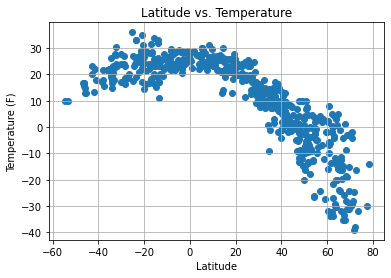

In [90]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

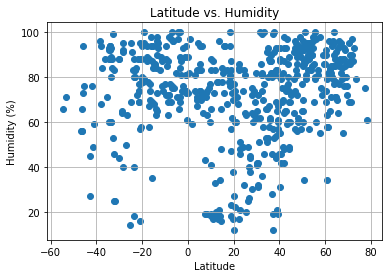

In [91]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

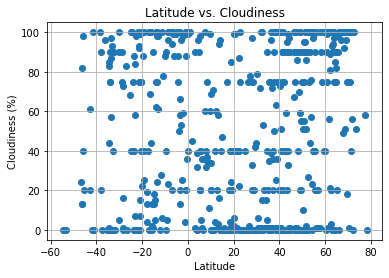

In [92]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

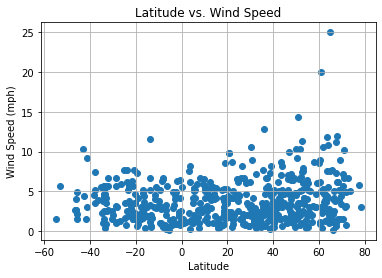

In [93]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [94]:
north_df = weather_data[weather_data['Lat'] > 0]
north_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Kyren,51.6828,102.1408,-13.63,87,86,0.73,RU,1614824921
6,Dikson,73.5069,80.5464,-32.05,79,51,5.09,RU,1614824922
12,Balkanabat,39.5108,54.3671,8.22,67,75,2.60,TM,1614824923
13,Kirgiz-Miyaki,53.6324,54.7979,-12.65,95,57,3.44,RU,1614824923
14,Barrow,71.2906,-156.7887,-28.00,69,40,3.09,US,1614824454
15,Matagami,49.7502,-77.6328,-20.00,77,75,4.63,CA,1614824923
16,North Bend,43.4065,-124.2243,8.33,76,90,1.54,US,1614824924
17,Nālūt,30.3333,10.8500,13.30,42,79,10.62,LY,1614824924
18,Torbay,47.6666,-52.7314,-4.44,86,90,7.20,CA,1614824924
20,Carson City,39.1638,-119.7674,9.44,19,1,1.54,US,1614824844


In [95]:
south_df = weather_data[weather_data['Lat'] < 0]
south_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,26.69,80,84,3.81,PF,1614824920
1,Hermanus,-34.4187,19.2345,18.89,93,83,3.77,ZA,1614824920
2,Hobart,-42.8794,147.3294,23.00,27,20,10.29,AU,1614824921
4,Klerksdorp,-26.8521,26.6667,18.52,50,83,1.29,ZA,1614824921
5,Kavieng,-2.5744,150.7967,28.52,74,25,4.97,PG,1614824922
7,Mataura,-46.1927,168.8643,16.67,56,13,2.68,NZ,1614824922
8,Busselton,-33.6500,115.3333,23.26,80,57,5.46,AU,1614824453
9,Pisco,-13.7000,-76.2167,24.00,73,75,6.69,PE,1614824453
10,Bluff,-46.6000,168.3333,16.67,56,24,2.68,NZ,1614824455
11,Vaini,-21.2000,-175.2000,29.00,74,75,5.66,TO,1614824912


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7855337805341992


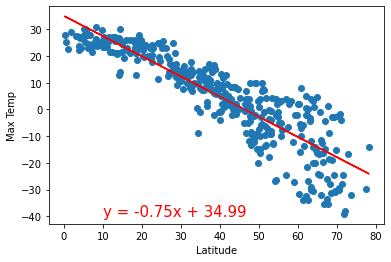

In [106]:
# Print out the r-squared value along with the plot.
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.24591275246535313


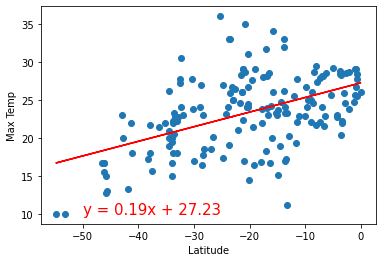

In [105]:
# Print out the r-squared value along with the plot.
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13737836479308813


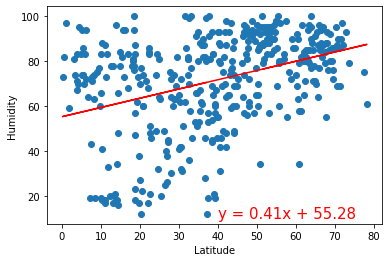

In [104]:
# Print out the r-squared value along with the plot.
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.058554617761462154


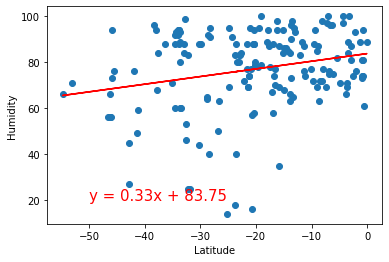

In [108]:
# Print out the r-squared value along with the plot.
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12753069730927075


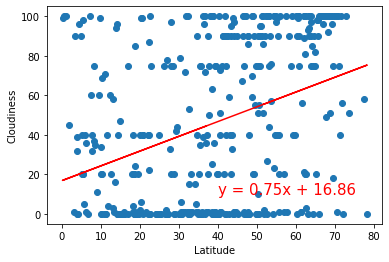

In [109]:
# Print out the r-squared value along with the plot.
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.060407689031752775


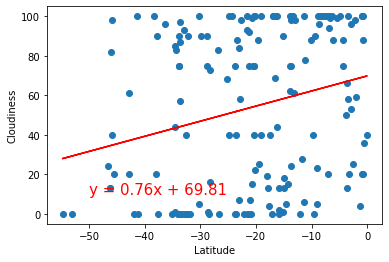

In [111]:
# Print out the r-squared value along with the plot.
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02852535381416755


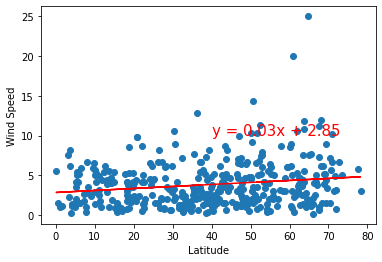

In [112]:
# Print out the r-squared value along with the plot.
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04764868559925678


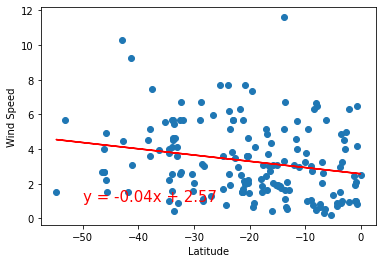

In [114]:
# Print out the r-squared value along with the plot.
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,1),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()